In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Problem 1

Exercise 4.1

In [1]:
P = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
  ])

u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j], f[j])
print(u)

[ 0.   2.5  5.   7.5 10.   8.6  7.2  5.8  4.4  3.   0. ]


### Problem 2

Exercise 4.3 (a)

In [2]:
u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])
cost = 0.75

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j] - cost, f[j])
print(u)

[ 0.    2.    4.    6.25 10.    7.25  6.    4.    3.    3.    0.  ]


Exercise 4.3 (b)

In [3]:
u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])
discount_rate = 0.95

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j] * discount_rate, f[j])
print(u)

[ 0.          2.          4.14043584  6.71670702 10.          7.6
  6.          4.55447942  3.58837772  3.          0.        ]


Exercise 4.3 (c) why does solution has different answer??

In [4]:
u = np.array([0, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0])
f = np.array([0,  2,  4,  6, 10,  7,  6,  4,  3,  3,  0])

for i in range(100):
  u = np.matmul(P, u)
  for j in range(len(u)):
    u[j] = max(u[j] * discount_rate - cost, f[j])
print(u)

[ 0.  2.  4.  6. 10.  7.  6.  4.  3.  3.  0.]


### Problem 5

4.8 Consider a simple "Wheel of Fortune" game. A wheel is divided into 12 equal-sized wedges. Eleven of the edges are marked with the numbers 100, 200, . . . , 1100 denoting an amount of money won fi the wheel lands on those numbers. The twelfth wedge is marked "bankrupt." A player can spin as many times as he or she wants. Each time the wheel lands on a numbered wedge, the player receives that much money which is added to h i sher previous winnings. However, fi the wheel ever lands on the "bankrupt" wedge, the player loses all of h i sh e r money that has been won up to that point. The player may quit at any time, and take all the money he or she has won (assuming the "bankrupt" wedge has not come up).
Assuming that the goal is to maximize one's expected winnings in this game, devise an optimal strategy for playing this game and compute one's expected winnings. You may wish to try a computer simulation first.


In [22]:
wedges = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, -1])

raw_data = {}
# number of planned spins
for i in range(1, 200):
  # number of trials
  raw_data[i] = []
  for j in range(1000):
    
    curr_sum = 0
    for k in range(i):
      spin = np.random.choice(wedges)

      if spin == -1:
        break
      curr_sum += spin

    raw_data[i].append(curr_sum)

df = pd.DataFrame(raw_data)
df_transposed = df.T
df_transposed['mean'] = df_transposed.mean(axis=1)
df_mean = df_transposed[['mean']]
df_mean

,mean
1,556.5
2,1056.7
3,1506.1
4,1928.2
5,2320.1
...,...
195,6619.1
196,6492.1
197,6287.8
198,6284.8


<Axes: >

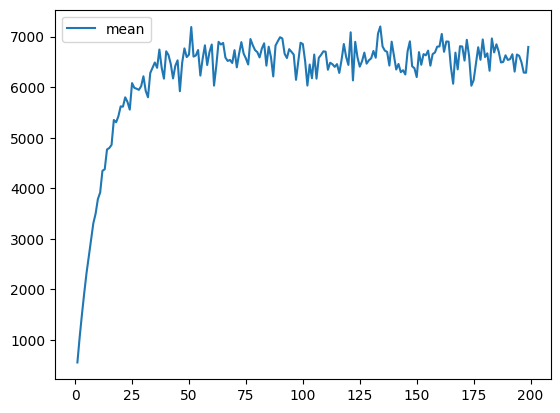

In [23]:
df_mean.plot()

Intuitively, the number of spins that maximize expected value is the point of inflection where the second standard derivation first turns negative. The point of inflections looks to be in the first ~ 15 spins.

In [38]:
raw_data = {}
# number of planned spins
for i in range(1, 25):
  # number of trials
  raw_data[i] = []
  for j in range(10000):
    
    curr_sum = 0
    for k in range(i):
      spin = np.random.choice(wedges)

      if spin == -1:
        break
      curr_sum += spin

    raw_data[i].append(curr_sum)

df = pd.DataFrame(raw_data)
df_transposed = df.T
df_transposed['mean'] = df_transposed.mean(axis=1)
df_mean = df_transposed[['mean']]
df_mean

,mean
1,553.50
2,1057.65
3,1522.75
4,1936.23
5,2306.08
6,2675.38
7,3016.72
8,3329.31
9,3570.86
10,3829.87


<Axes: >

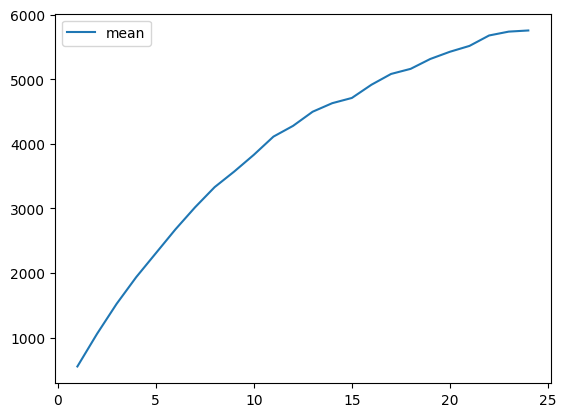

In [39]:
df_mean.plot()